In [1]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import StratifiedShuffleSplit
import time
from random import randrange
from past.builtins import xrange
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


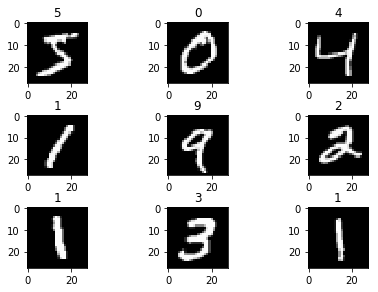

In [2]:
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###################################1##########################################
# TODO: Print the shape of the training data and testing data               #
# Plot the previous 9 training data and title their class                   #
# Count the number of data for each class in training data                  #
#############################################################################

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

ar1,ar2 = np.unique(y_train, return_counts=True)
print(ar1)
print(ar2)

fig, axar =plt.subplots(3,3)
plt.tight_layout()

for i in range(0,9):
    axar[int(i/3),i%3].set_title(str(y_train[i]))
    axar[int(i/3),i%3].imshow(X_train[i])
    
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################



In [3]:
# split train and validation
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.4, random_state = 0)
for train_idx, val_idx in sss.split(X_train, y_train):
    X_train_2, X_val_2 = X_train[train_idx], X_train[val_idx]
    y_train_2, y_val_2 = y_train[train_idx], y_train[val_idx]

print (X_train_2.shape)
print (y_train_2.shape)
print (X_val_2.shape)
print (y_val_2.shape)

ar3,ar4 = np.unique(y_train_2, return_counts=True)
print(ar3)
print(ar4)


(36000, 28, 28)
(36000,)
(24000, 28, 28)
(24000,)
[0 1 2 3 4 5 6 7 8 9]
[3554 4045 3575 3678 3505 3253 3551 3759 3511 3569]


In [4]:
X_train_re = X_train_2.reshape(X_train_2.shape[0], 28*28)
X_val_re = X_val_2.reshape(X_val_2.shape[0], 28*28)
X_test_re = X_test.reshape(X_test.shape[0], 28*28)

y_train_re = np.zeros((y_train_2.shape[0], 10))
y_val_re = np.zeros((y_val_2.shape[0], 10))
y_test_re = np.zeros((y_test.shape[0], 10))


for i,j in enumerate(y_train_2):
    y_train_re[i][int(j)] = 1
for i,j in enumerate(y_val_2):
    y_val_re[i][int(j)] = 1
for i,j in enumerate(y_test):
    y_test_re[i][int(j)] = 1



print (X_train_re.shape)
print (X_val_re.shape )
print (X_test_re.shape )
print (X_val_re.shape)
print (y_train_2.shape)
print (y_val_2.shape)

(36000, 784)
(24000, 784)
(10000, 784)
(24000, 784)
(36000,)
(24000,)


In [5]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras import initializers

In [6]:
def hyper_tuning(lr = 1e-4, transferfn = 'relu', batch_size = 512, epochs = 40, optimizer = Adam, kernel_initializer = initializers.RandomUniform() ):
    dimension_ = 10
    model1 = models.Sequential()
    model1.add(layers.Dense(160, activation = transferfn, input_shape = (28*28, ), kernel_initializer = kernel_initializer))
    model1.add(layers.Dense(250, activation = transferfn, kernel_initializer = kernel_initializer))
    model1.add(layers.Dense(100, activation = transferfn, kernel_initializer = kernel_initializer))
    model1.add(layers.Dense(160, activation = transferfn, kernel_initializer = kernel_initializer))
    model1.add(layers.Dense(10, activation = 'softmax'))
    model1.summary()


    model1.compile(
                  optimizer=optimizer(lr = lr),
#                   optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

    history = model1.fit(X_train_re, 
                        y_train_re, 
                        epochs = epochs, 
                        batch_size = batch_size, 
                        validation_data = (X_val_re, y_val_re))
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    results = model1.evaluate(X_test_re, y_test_re)
    return results

In [ ]:
lr_arr = [ 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
transfer_fn_arr = ['elu', 'selu', 'relu', 'tanh', 'sigmoid', 'linear']
batch_size_arr = [20, 30, 50, 100, 200]
epochs_arr = [100, 200, 300, 400, 500]
optimizer_arr = [SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam]
weight_initialization_arr = [initializers.RandomUniform()
                            , initializers.lecun_uniform()
                            , initializers.he_uniform()
                            , initializers.glorot_uniform()
                            , initializers.lecun_normal()
                            , initializers.he_normal()
                            , initializers.glorot_normal()]

lr_results = dict()
transfer_fn_results = dict()
batch_size_results = dict()
epochs_results = dict()
optimizer_results = []
weight_initialization_results = []


In [ ]:
for i,j in enumerate(lr_arr):
    if(i == 0) :
        lr_results[str(j)] = hyper_tuning(lr = j, epochs = 5)
        continue
    lr_results[str(j)] = hyper_tuning(lr = j)


In [ ]:
for i in transfer_fn_arr:
    transfer_fn_results[i] = hyper_tuning(transferfn = i)


In [ ]:
for i in batch_size_arr:
    batch_size_results[str(i)] = hyper_tuning(batch_size = i)


In [ ]:
for i in epochs_arr:
    epochs_results[str(i)] = hyper_tuning(epochs = i)
 

In [ ]:
for i in optimizer_arr:
    optimizer_results.append(hyper_tuning(optimizer = i))


In [ ]:
for i in weight_initialization_arr:
    weight_initialization_results.append(hyper_tuning(kernel_initializer = i))


In [ ]:
print (lr_results)


x_axis = lr_arr
y_axis = []
for i in lr_arr:
    y_axis.append(lr_results[str(i)][1])

# print(x_axis)
# print(y_axis)
plt.plot(x_axis, y_axis, 'bo')
# plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('lr - acc')
plt.xlabel('learning rate')
plt.ylabel('acc')
plt.savefig('./imgs/lr-acc')

plt.show()


In [ ]:
# print (transfer_fn_arr)
# print (transfer_fn_results)
# print (transfer_fn_results['elu'])

x_axis = transfer_fn_arr
y_axis = []
for i in transfer_fn_arr:
    y_axis.append(transfer_fn_results[i][1])

# print(x_axis)
# print(y_axis)
plt.plot(x_axis, y_axis, 'bo')
# plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('transfer - acc')
plt.xlabel('transfer')
plt.ylabel('acc')
plt.savefig('./imgs/transfer-acc')

plt.show()


In [ ]:
batch_size_results


x_axis = batch_size_arr
y_axis = []
for i in batch_size_arr:
    y_axis.append(batch_size_results[str(i)][1])

# print(x_axis)
# print(y_axis)
plt.plot(x_axis, y_axis, 'bo')
# plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('batch_size - acc')
plt.xlabel('batch_size')
plt.ylabel('acc')
plt.savefig('./imgs/batch_size-acc')

plt.show()

In [ ]:
epochs_results


x_axis = epochs_arr
y_axis = []
for i in epochs_arr:
    y_axis.append(epochs_results[str(i)][1])

# print(x_axis)
# print(y_axis)
plt.plot(x_axis, y_axis, 'bo')
# plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('epochs - acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.savefig('./imgs/epochs-acc')

plt.show()

In [ ]:
optimizer_arr = [SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam]
print(optimizer_results)


x_axis = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
y_axis = []
for i,j in enumerate(x_axis):
    y_axis.append(optimizer_results[i][1])

# print(x_axis)
# print(y_axis)
plt.plot(x_axis, y_axis, 'bo')
# plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('optimizer - acc')
plt.xlabel('optimizer')
plt.ylabel('acc')
plt.savefig('./imgs/optimizer-acc')

plt.show()

In [ ]:
weight_initialization_arr = [initializers.RandomUniform()
                            , initializers.lecun_uniform()
                            , initializers.he_uniform()
                            , initializers.glorot_uniform()
                            , initializers.lecun_normal()
                            , initializers.he_normal()
                            , initializers.glorot_normal()]

print(weight_initialization_results)




x_axis = ['RandomUniform','lecun_uniform', 'he_uniform', 'glorot_uniform', 'lecun_normal', 'he_normal', 'glorot_normal']
y_axis = []
for i,j in enumerate(x_axis):
    y_axis.append(weight_initialization_results[i][1])

# print(x_axis)
# print(y_axis)
plt.plot(x_axis, y_axis, 'bo')
# plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('weight_initialization - acc')
plt.xlabel('weight_initialization')
plt.ylabel('acc')
plt.tight_layout()
plt.savefig('./imgs/weight_initialization-acc')

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 160)               125600    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               40250     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_4 (Dense)              (None, 160)               16160     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1610      
Total params: 208,720
Trainable params: 208,720
Non-trainable params: 0
_________________________________________________________________
Train on 36000 samples, validate on 24000 samples
Epoch 1/400
36000/36000 [==============================] - 4s 99us/step - loss: 0.4958

Epoch 52/400
36000/36000 [==============================] - 3s 96us/step - loss: 6.6493e-06 - acc: 1.0000 - val_loss: 0.1510 - val_acc: 0.9776
Epoch 53/400
36000/36000 [==============================] - 3s 96us/step - loss: 5.6353e-06 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 0.9775
Epoch 54/400
36000/36000 [==============================] - 3s 93us/step - loss: 4.7370e-06 - acc: 1.0000 - val_loss: 0.1535 - val_acc: 0.9775
Epoch 55/400
36000/36000 [==============================] - 3s 93us/step - loss: 3.9753e-06 - acc: 1.0000 - val_loss: 0.1547 - val_acc: 0.9772
Epoch 56/400
36000/36000 [==============================] - 4s 98us/step - loss: 3.3738e-06 - acc: 1.0000 - val_loss: 0.1559 - val_acc: 0.9775
Epoch 57/400
36000/36000 [==============================] - 3s 93us/step - loss: 2.8275e-06 - acc: 1.0000 - val_loss: 0.1573 - val_acc: 0.9772
Epoch 58/400
36000/36000 [==============================] - 3s 92us/step - loss: 2.4105e-06 - acc: 1.0000 - val_loss: 0.1584 - val_acc: 0.9774

36000/36000 [==============================] - 3s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2007 - val_acc: 0.9772
Epoch 110/400
36000/36000 [==============================] - 3s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2007 - val_acc: 0.9773
Epoch 111/400
36000/36000 [==============================] - 3s 96us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2008 - val_acc: 0.9773
Epoch 112/400
36000/36000 [==============================] - 3s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2008 - val_acc: 0.9773
Epoch 113/400
36000/36000 [==============================] - 3s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2006 - val_acc: 0.9772
Epoch 114/400
36000/36000 [==============================] - 3s 96us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 115/400
36000/36000 [==============================] - 4s 111us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2011 - val_acc: 0.9773
Epoch

Epoch 166/400
36000/36000 [==============================] - 3s 96us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 167/400
36000/36000 [==============================] - 4s 101us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 168/400
36000/36000 [==============================] - 4s 101us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 169/400
36000/36000 [==============================] - 4s 101us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 170/400
36000/36000 [==============================] - 3s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 171/400
36000/36000 [==============================] - 3s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 172/400
36000/36000 [==============================] - 3s 97us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_a

36000/36000 [==============================] - 4s 115us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 223/400
36000/36000 [==============================] - 4s 104us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 224/400
36000/36000 [==============================] - 4s 105us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 225/400
36000/36000 [==============================] - 4s 108us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 226/400
36000/36000 [==============================] - 4s 104us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 227/400
36000/36000 [==============================] - 5s 133us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 228/400
36000/36000 [==============================] - 4s 119us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773

36000/36000 [==============================] - 4s 100us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 279/400
36000/36000 [==============================] - 4s 111us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 280/400
36000/36000 [==============================] - 4s 115us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 281/400
36000/36000 [==============================] - 4s 102us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 282/400
36000/36000 [==============================] - 4s 106us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 283/400
36000/36000 [==============================] - 4s 105us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 284/400
36000/36000 [==============================] - 4s 125us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773

36000/36000 [==============================] - 4s 115us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 335/400
36000/36000 [==============================] - 3s 97us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 336/400
36000/36000 [==============================] - 4s 101us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 337/400
36000/36000 [==============================] - 5s 129us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 338/400
36000/36000 [==============================] - 4s 98us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 339/400
36000/36000 [==============================] - 4s 99us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 340/400
36000/36000 [==============================] - 4s 112us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Ep

36000/36000 [==============================] - 5s 128us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 391/400
36000/36000 [==============================] - 4s 109us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 392/400
36000/36000 [==============================] - 5s 126us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 393/400
36000/36000 [==============================] - 4s 111us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 394/400
36000/36000 [==============================] - 3s 95us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 395/400
36000/36000 [==============================] - 3s 90us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Epoch 396/400
36000/36000 [==============================] - 3s 91us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9773
Ep

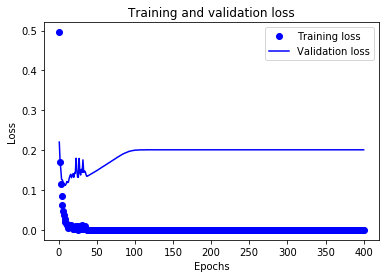

10000/10000 [==============================] - 1s 51us/step


In [7]:
best_result = hyper_tuning(lr=0.0001, batch_size=100, epochs=400, optimizer=Adam, transferfn='relu')

In [8]:
print (best_result)

[0.196838284504837, 0.978]
